In [1]:
# Bibliotectas
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos
global x0, y0, tolerancia, h, g

In [2]:
# Solucion con aceleracion de arrastre y de Magnus
def solucion_aceleraciones():
    x=[0,13.721,26.817,39.340,51.333,62.839,73.895,84.533,94.784,104.678,114.238,123.490,132.455,141.152,149.601,157.817,165.818,173.617,181.228,188.664,195.936,203.054,210.030,216.871,223.587,230.185,236.673,243.057,249.344,255.540,261.650,267.678,273.631,279.511,285.323,291.071,296.758,302.388,307.963,313.487,318.962,324.392,329.778,335.124,340.431,345.702,350.940,356.146,361.323,366.473,371.598,376.700,381.782,386.844,391.890,396.920,401.938,406.944,411.940,416.928,421.911,426.888,431.862]
    y=[1.51,9.789,17.748,25.390,32.717,39.732,46.437,52.836,58.931,64.724,70.220,75.420,80.326,84.942,89.270,93.311,97.069,100.545,103.741,106.660,109.302,111.671,113.767,115.592,117.149,118.438,119.461,120.220,120.717,120.952,120.929,120.649,120.114,119.326,118.286,116.998,115.463,113.684,111.665,109.407,106.913,104.187,101.232,98.052,94.649,91.028,87.192,83.145,78.891,74.435,69.781,64.932,59.893,54.669,49.264,43.683,37.929,32.008,25.924,19.682,13.286,6.741,0.051]
    return [x, y]

In [14]:
# Solucion analitica
def solucion_analitica(v0: float, alpha:float):
    """
    Función que calcula la trayectoria de un proyectil analíticamente.

    Parámetros:
        v0: velocidad inicial
        
        alpha: ángulo de lanzamiento
    """
    # Crear arreglos con condiciones iniciales
    t = [0]
    x = [x0]
    y = [y0]
    # Iterar
    while y[-1] > tolerancia:
        # Calcular los nuevos valores
        x_new = v0*cos(alpha)*t[-1]
        y_new = v0*sin(alpha)*t[-1] - ((1/2)*g*(t[-1]**2)) + 1.51
        t_new = t[-1] + h
        # Agregar los valores a los arreglos
        x.append(x_new)
        y.append(y_new)
        t.append(t_new)
        
    return [x, y]

In [15]:
# Polinomio de Taylor 3 orden
def taylor3():
    """
    Función que calcula la trayectoria de un proyectil usando un polinomio de Taylor de 3 orden.

    Parámetros:
        None
    """
    # Crear arreglos con condiciones iniciales
    t = [0]
    x = [x0]
    y = [y0]
    # Iterar
    while y[-1] > tolerancia:
        t_new = t[-1] + h
        x_new = 140.4263*t_new
        y_new = 84.3766*t_new - 16.1*(t_new**2) + 1.51
        # Agregar al arreglo
        x.append(x_new)
        y.append(y_new)
        t.append(t_new)
        
    return [x, y]

In [16]:
# Euler
def euler(v0: float, alpha:float):
    """
    Función que calcula la trayectoria de un proyectil usando el método de Euler.

    Parámetros:
        v0: velocidad inicial
        
        alpha: ángulo de lanzamiento
    """
    # Crear arreglos con condiciones iniciales
    t = [0]
    x = [x0]
    y = [y0]
    # Iterar
    while y[-1] > tolerancia:
        # Calcular los nuevos valores
        x_new = x[-1] + h*(v0*cos(alpha))
        y_new = y[-1] + h*(v0*sin(alpha) - g*t[-1])
        t_new = t[-1] + h
        # Agregar los valores a los arreglos
        x.append(x_new)
        y.append(y_new)
        t.append(t_new)
        
    return [x, y]

In [17]:
# Euler-Gauss
def euler_gauss(v0: float, alpha:float):
    """
    Función que calcula la trayectoria de un proyectil usando el método de Euler-Gauss.

    Parámetros:
        v0: velocidad inicial
        
        alpha: ángulo de lanzamiento
    """
    # Crear arreglos con condiciones iniciales
    t = [0]
    x = [x0]
    y = [y0]
    # Iterar
    while y[-1] > tolerancia:
        # Calcular los nuevos valores
        t_new = t[-1] + h
        x_new = x[-1] + (h/2)*((v0*cos(alpha)) + (v0*cos(alpha)))
        y_new = y[-1] + (h/2)*((v0*sin(alpha) - g*t[-1])+(v0*sin(alpha) - g*t_new))
        # Agregar los valores a los arreglos
        x.append(x_new)
        y.append(y_new)
        t.append(t_new)
        
    return [x, y]

In [18]:
# Runge-Kutta 2 orden
def runge_kutta2(v0: float, alpha:float):
    """
    Función que calcula la trayectoria de un proyectil usando el método de Runge-Kutta de 2 orden.

    Parámetros:
        v0: velocidad inicial
        
        alpha: ángulo de lanzamiento
    """
    # Crear arreglos con condiciones iniciales
    t = [0]
    x = [x0]
    y = [y0]
    # Iterar
    while y[-1] > tolerancia:
        # calcular k para x
        k_1x = h*(v0*cos(alpha))
        k_2x = h*(v0*cos(alpha))
        # calcular k para y
        k_1y = h*(v0*sin(alpha) - g*t[-1])
        k_2y = h*(v0*sin(alpha) - g*(t[-1] + h))
        # Calcular los nuevos valores
        x_new = x[-1] + (1/2)*(k_1x + k_2x)
        y_new = y[-1] + (1/2)*(k_1y + k_2y)
        t_new = t[-1] + h
        # Agregar los valores a los arreglos
        x.append(x_new)
        y.append(y_new)
        t.append(t_new)
        
    return [x, y]

In [19]:
# Runge-Kutta 4 orden
def runge_kutta4(v0: float, alpha:float):
    """
    Función que calcula la trayectoria de un proyectil usando el método de Runge-Kutta de 4 orden.

    Parámetros:
        v0: velocidad inicial
        
        alpha: ángulo de lanzamiento
    """
    # Crear arreglos con condiciones iniciales
    t = [0]
    x = [x0]
    y = [y0]
    # Iterar
    while y[-1] > tolerancia:
        # calcular k para x
        k_1x = h*(v0*cos(alpha))
        k_2x = h*(v0*cos(alpha))
        k_3x = h*(v0*cos(alpha))
        k_4x = h*(v0*cos(alpha))
        # calcular k para y
        k_1y = h*(v0*sin(alpha) - g*t[-1])
        k_2y = h*(v0*sin(alpha) - g*(t[-1] + (h/2)))
        k_3y = h*(v0*sin(alpha) - g*(t[-1] + (h/2)))
        k_4y = h*(v0*sin(alpha) - g*(t[-1] + h))
        # Calcular los nuevos valores
        x_new = x[-1] + (1/6)*(k_1x+2*k_2x+2*k_3x+k_4x)
        y_new = y[-1] + (1/6)*(k_1y+2*k_2y+2*k_3y+k_4y)
        t_new = t[-1] + h
        # Agregar los valores a los arreglos
        x.append(x_new)
        y.append(y_new)
        t.append(t_new)
        
    return [x, y]

In [30]:
# Graficar
def graficar(titulo: str, *args: list):
    """
    Funcion para graficar los resultados de los metodos.

    Parámetros:
        titulo: titulo de la grafica
        
        args: lista de listas con los valores de x, y, error, nombre del metodo, color y marcador.
    """
    # crear una figura para 2 graficas
    fig, ax1 = plt.subplots(1, 1, figsize=(20, 7))
    fig.set_facecolor('white')
    # Grafica 1
    ax1.set_title(titulo, fontsize=30)
    ax1.set_xlabel('x [ft]', fontsize=20)
    ax1.set_ylabel('y [ft]', fontsize=20)
    ax1.grid()
    ax1.set_xlim(0, args[0][0][-1]*1.1)
    ax1.set_ylim(0, 134*1.1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    # Valores reales
    ax1.axvline(x=400, color='darkorange', linestyle='dotted', label='barda del campo', linewidth=5)
    ax1.axvline(x=482, color='lightcoral', linestyle='dotted', label='Distancia real',linewidth=5)
    ax1.axhline(y=134, color='darkcyan', linestyle='dotted', label='Altura maxima real',linewidth=5)
    for metodo in args:
        ax1.plot(metodo[0], metodo[1], label = metodo[2], color = metodo[3], linestyle = metodo[4], markevery = 100)
    lg=ax1.legend(fontsize=20, loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.tight_layout()
    plt.savefig('{}.png'.format(titulo), bbox_inches='tight', bbox_extra_artists=(lg,))


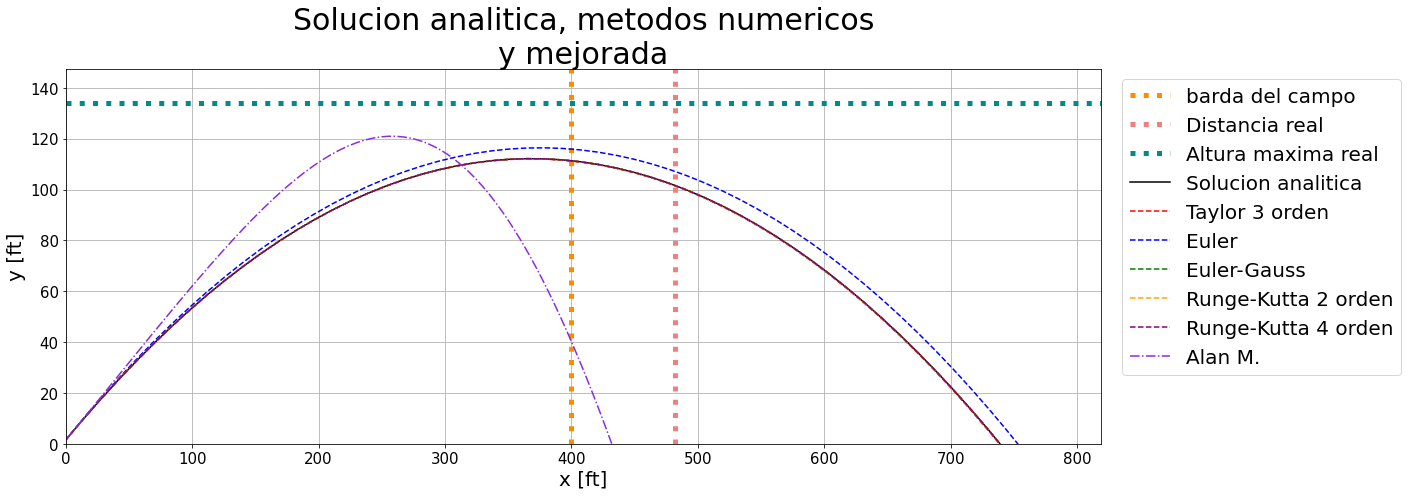

In [32]:
# Condiciones iniciales
v0 = 111.7 # mph
v0 = v0*5280/3600 # ft/s
alpha = 31*np.pi/180 # rad
x0 = 0 # ft
y0 = 1.51 # ft
# Constantes
tolerancia = 0.001
h = 0.1 # s
g = 32.174 # ft/s^2

# Solucion analitica
sol_analitica = solucion_analitica(v0, alpha)
# Metodos numericos
sol_taylor = taylor3()
sol_euler = euler(v0, alpha)
sol_euler_gauss = euler_gauss(v0, alpha)
sol_runge_kutta2 = runge_kutta2(v0, alpha)
sol_runge_kutta4 = runge_kutta4(v0, alpha)
# Solucion con aceleracion de arrastre y de Magnus
sol_arrastre = solucion_aceleraciones()

# Parametros para graficar
sol_analitica.extend(['Solucion analitica', 'black', '-'])
sol_taylor.extend(['Taylor 3 orden', 'red', '--'])
sol_euler.extend(['Euler', 'blue', '--'])
sol_euler_gauss.extend(['Euler-Gauss', 'green', '--'])
sol_runge_kutta2.extend(['Runge-Kutta 2 orden', 'orange', '--'])
sol_runge_kutta4.extend(['Runge-Kutta 4 orden', 'purple', '--'])
sol_arrastre.extend(['Alan M.', 'blueviolet', '-.'])
# Graficar
graficar('Solucion analitica, metodos numericos\ny mejorada', sol_analitica, sol_taylor, sol_euler, sol_euler_gauss, sol_runge_kutta2, sol_runge_kutta4, sol_arrastre)
